# Install & Load Package

In [1]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042462 sha256=40ff79c27a3cd12824a798e0c2f30b5e23b7e515ceff11d1773039d1da33dcf8
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=d38a379e5d13e025a204da1471b2fc6cb6eaa9da31368dbfa43e5b2e497b2315
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [2]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [3]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
#import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
#import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

# Load Dataset

In [79]:
# load customer churn dataset
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

In [80]:
# check the first 5 data frim churn_data
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [82]:
#cek missing value

df.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [83]:
df.duplicated().sum()

0

there is no missing value and duplicate data

In [84]:
#check catgorical columns

categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['attrition_flag', 'gender', 'education_level', 'marital_status',
       'income_category', 'card_category'],
      dtype='object')

In [85]:
#check numerical columns

numerical = df.select_dtypes(include=['float64', 'int64']).columns
numerical

Index(['user_id', 'customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [86]:
# numerical statistical sumary
df[numerical].describe()

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [87]:
# describe method on categorical data
df[categorical].describe()

,attrition_flag,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


#Questions

## 1. a.	Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

diketahui nasabah yg churn dan tidak hurn berada pada column 'attrition_flag', dimana:
- Existing Customer = No Churn
- Attrited Customer = Churn

Text(0, 0.5, 'Frekuensi')

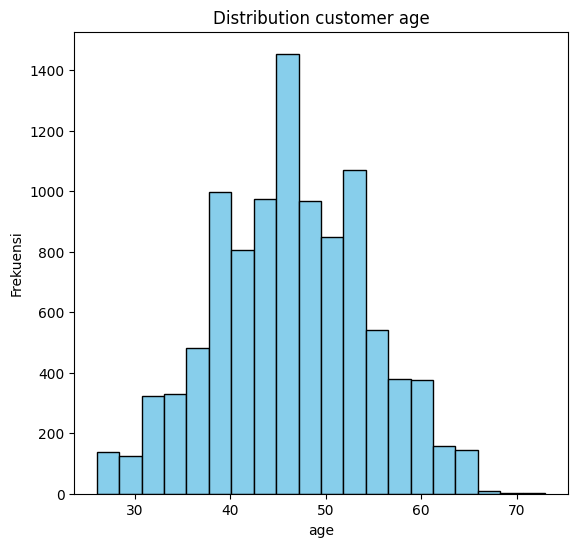

In [25]:
# age of customer churn distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['customer_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution customer age')
plt.xlabel('age')
plt.ylabel('Frekuensi')



distribusi usia nasabah memiliki skew yg normal,Ini menunjukkan bahwa usia nasabah tidak tersebar terlalu lebar, melainkan terpusat di sekitar usia 40-52 tahun. dengan jumlah paling tinggi berada disekitar 46/47 tahun.

In [27]:
# choose churn customer for histogram
churn_customer = df[df['attrition_flag'] == 'Attrited Customer']

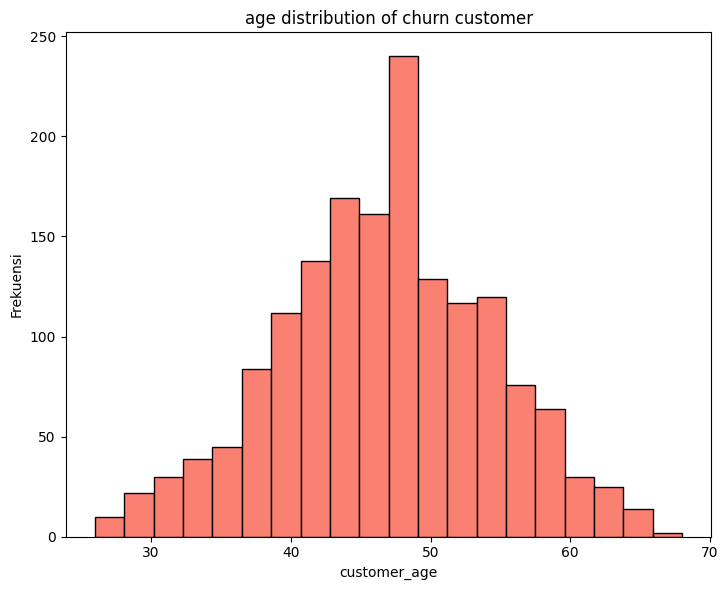

In [28]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.hist(churn_customer['customer_age'], bins=20, color='salmon', edgecolor='black')
plt.title('age distribution of churn customer')
plt.xlabel('customer_age')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Jawaban:**

usia nasabah yang paling banyak churn yaitu sekitar 48/49 tahun. sehingga pada usia tersebut kemungkinan banyak mengalami churn dibuktikan pada data histogram diatas. hal tersebut masih masuk akal mengingat usia tersebut merupakan usia paling banyak dalam data nasabah.

Ini juga bisa menandakan bahwa strategi atau penawaran yg diberikan mungkin perlu disesuaikan untuk memenuhi kebutuhan khusus kelompok usia tersebut.

##1.b.	Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

In [29]:
#melihat jumlah nasabah churn/no churn
df['attrition_flag'].value_counts()

,count
attrition_flag,
Existing Customer,8500
Attrited Customer,1627


In [30]:
#melihat jumlah tingkat pendididkan nasabah
df['education_level'].value_counts()

,count
education_level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [34]:
#melihat jumlah income category nasabah
df['income_category'].value_counts()

,count
income_category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [33]:
#melakukan pengelompokan hubungan antara education_level dan income_category melalaui pivot
income_education = pd.pivot_table(df,
                                  index='education_level',
                                  columns='income_category',
                                  aggfunc='size',
                                  fill_value=0)

In [35]:
# Menghitung total baris untuk setiap baris
row_totals = income_education.sum(axis=1)

# Menghitung persentase
percentage_table = income_education.div(row_totals, axis=0) * 100
percentage_table

income_category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
education_level,,,,,,
College,6.910168,18.065153,13.030602,17.275420,34.057256,10.661402
Doctorate,8.203991,15.521064,13.082040,12.638581,35.033259,15.521064
Graduate,6.521739,17.679028,13.491049,15.281330,36.413043,10.613811
High School,7.302534,17.635370,15.250869,15.300546,33.333333,11.177347
Post-Graduate,5.813953,21.511628,14.922481,15.697674,32.945736,9.108527
Uneducated,8.002690,16.745124,13.113652,14.593141,35.104237,12.441157
Unknown,7.899934,17.709019,13.824885,14.417380,36.603028,9.545754


**Jawaban:**

jadi correlation antara education_level dan income_category tidak terlalu significant karena dilihat dari income yang paling tinggi $120k+ antara doctorate (8.2%) dan uneducated (8%) tidak berbeda jauh. begitu juga dengan perbandingan income_category lainnya jika dibandingkan dengan education level juga tidak terlalu jauh.

## 1.c. Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

In [36]:
# melihat jumlah nasabah berdasarkan gender
df['gender'].value_counts()

,count
gender,
F,5358
M,4769


In [37]:
# membuat tabel churn berdasarkan gender
gender_churn = pd.crosstab(df['gender'], df['attrition_flag'])
gender_churn

attrition_flag,Attrited Customer,Existing Customer
gender,,
F,930,4428
M,697,4072


In [38]:
# melakukan uji chi-square untuk mengetahui hubungan kedua variabel
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(gender_churn)

In [39]:
# Menampilkan hasil
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 13.86561370063734
P-value: 0.00019635846717310307
Degrees of freedom: 1
Expected frequencies:
[[ 860.81425891 4497.18574109]
 [ 766.18574109 4002.81425891]]


In [40]:
# interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara gender dengan kemungkinan churn.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara gender dengan kemungkinan churn.")

Terdapat perbedaan yang signifikan antara gender dengan kemungkinan churn.


Ini menunjukkan bahwa gender mungkin mempengaruhi kemungkinan nasabah untuk churn, berdasarkan data dan analisis yang dilakukan.

## 1.d.	Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

In [98]:
df['months_on_book'].value_counts()

,count
months_on_book,
36,2463
37,358
34,353
38,347
39,341
40,333
31,318
35,317
33,305


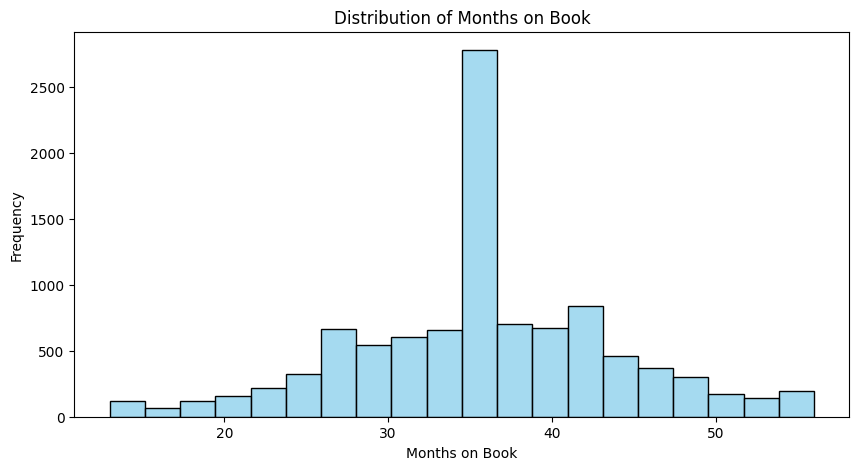

In [99]:
# membuat histogram untuk melihat distribusi months_on_book
plt.figure(figsize=(10, 5))
sns.histplot(df['months_on_book'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.show()


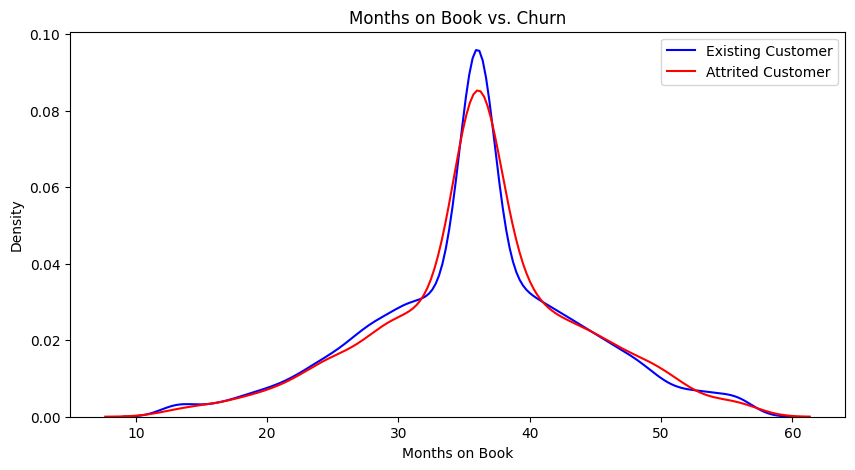

In [100]:
# membuat KDE plot untuk melihat hubungan antara months_on_book dan churn
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['attrition_flag'] == 'Existing Customer']['months_on_book'], label='Existing Customer', color='blue')
sns.kdeplot(df[df['attrition_flag'] == 'Attrited Customer']['months_on_book'], label='Attrited Customer', color='red')
plt.title('Months on Book vs. Churn')
plt.xlabel('Months on Book')
plt.ylabel('Density')
plt.legend()
plt.show()

**Jawaban:**

jika dilihat dari persebaran yang ada pada diagram diatas, jumlah nasabah churn (attrited) dan no churn (existing) hampir sama. dimana posisi terbanyak pada nasabah yang sudah bergabung selama 30 hingga 40 bulan. dan nasabah paling lama bergabung selama lebih dari 50+ bulan juga sama hasilnya antara yang churn dan no churn.

sehingga kemungkinan tidak ada sangkut pautnya antara lama nasabah bergabung dan tidak karena dari data diatas menunjukkan hasil yg hampir sama.


##1.e.	Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?

In [101]:
# melihat jumlah value pada contacts_count_12_mon
df['contacts_count_12_mon'].value_counts()

,count
contacts_count_12_mon,
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54


In [102]:
interact_churn = pd.pivot_table(df,
                                index='contacts_count_12_mon',
                                columns='attrition_flag',
                                aggfunc='size',
                                fill_value=0)
interact_churn


attrition_flag,Attrited Customer,Existing Customer
contacts_count_12_mon,,
0,7,392
1,108,1391
2,403,2824
3,681,2699
4,315,1077
5,59,117
6,54,0


dari data diatas kita akan mengelompokan menjadi 2 groups, yaitu:

- Low interaction, dengan jumlah interaksi 0-3
- High interaction, dengan jumlah interaksi 4-6

dari data diatas akan dilihat bagaimana perbandingan antara low interaction dan high interaction apakah mempengaruhi nasabah churn or not churn

In [105]:

# Membuat DataFrame baru dengan mengelompokkan contacts_count_12_mon
interaction_bins = pd.cut(df['contacts_count_12_mon'], bins=[-1, 3, 6], labels=['Low Interaction', 'High Interaction'])

,contacts_count_12_mon
0,Low Interaction
1,Low Interaction
2,Low Interaction
3,Low Interaction
4,Low Interaction
...,...
10122,Low Interaction
10123,Low Interaction
10124,High Interaction
10125,Low Interaction


In [106]:
# Membuat tabel pivot dengan interaction_bins dan attrition_flag
interaction_churn = pd.crosstab(interaction_bins, df['attrition_flag'])

interaction_churn


attrition_flag,Attrited Customer,Existing Customer
contacts_count_12_mon,,
Low Interaction,1199,7306
High Interaction,428,1194


In [107]:
# Menghitung total baris untuk setiap baris
percentage = interaction_churn.sum(axis=1)

# Menghitung persentase
percentage_table = interaction_churn.div(percentage, axis=0) * 100
percentage_table


attrition_flag,Attrited Customer,Existing Customer
contacts_count_12_mon,,
Low Interaction,14.097590,85.902410
High Interaction,26.387176,73.612824


**Jawaban**:

pada hasil persentase diatas, dilihat dari customer churn justru high interaction lebih banyak dibandingkan low interaction.

tapi hal tersebut tidak sebanding jika dilihat dari hasil nasabah no churn.

jadi besar kecilnya interaksi antar nasabah dengan bank tidak terlalu berpengaruh secara significant

# Question No.2

##Pra-processing Data

In [110]:
# One-hot encoding untuk categorical features
df = pd.get_dummies(df, columns=['gender', 'education_level', 'marital_status', 'income_category', 'card_category'])


In [111]:
# Label encoding untuk attrition_flag
df['attrition_flag'] = df['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})


In [116]:
# drop kolom user_id karan tidak penting

df = df.drop(columns=['user_id'])


##Split data

In [117]:
# split features dan target variable, dimana test data=20%
X = df.drop('attrition_flag', axis=1)
y = df['attrition_flag']

# Split data training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)

##Modelling

Menggunakan random forest. dalam kasus ini, Random Forest digunakan untuk memprediksi kolom attrition_flag berdasarkan feature yang ada.

In [118]:
# Model Training dengan train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##Model Evaluation

In [119]:
# Model Evaluation
y_pred = rf_model.predict(X_test)

In [120]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

In [121]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9521
Precision: 0.9351
Recall: 0.7538
F1 Score: 0.8348
ROC AUC: 0.8719


dalam kasus ini menunjukkan performa yang sangat baik dengan akurasi tinggi, presisi yang kuat, dan F1 score yang memadai. Namun, recall yang sedikit lebih rendah menunjukkan bahwa mungkin ada ruang untuk perbaikan dalam hal menangkap lebih banyak kasus positif (attrited nasabah). Metrik ROC AUC yang tinggi menunjukkan bahwa model dapat membedakan antara kelas dengan baik.

In [122]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1684   17]
 [  80  245]]


In [123]:
# Classification Report
cr = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.94      0.75      0.83       325

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



model ini menunjukkan kinerja yang sangat baik dengan akurasi 95%, menunjukkan bahwa model benar dalam sebagian besar prediksi. Untuk kelas 0 (no churn), model memiliki precision tinggi (95%) dan recall yang sangat tinggi (99%), menunjukkan kemampuannya yang sangat baik dalam mendeteksi pelanggan yang ada.

Untuk kelas 1 (churn), precision tetap tinggi (94%), tetapi recall lebih rendah (75%), menunjukkan bahwa model kurang efektif dalam menangkap semua kasus pelanggan yang churn.

#Model Agnostic Method

In [130]:
# menggunakan default hyperparameter
random_forest_clf = RandomForestClassifier()

# Fit RandomForestClassifier dgn training data
random_forest_clf.fit(X_train, y_train)

# initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(random_forest_clf, X_train, y_train, label = "RF Interpretation")


Preparation of a new explainer is initiated

  -> data              : 8101 rows 37 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7aefb7853d90> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.44, mean = 0.000159, max = 0.42
  -> model_info        : package sklearn

A new explainer has been created!


##Feature IMportance

In [131]:
# visualize permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

feature yang paling berpengaruh pada terget yaitu:
- total_trans_ct
- total_trans_amt

##Partial Dependence Plot

In [132]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]


**Bussiness Recomendation:**

- Dari jumlah transaksi: Rancang campagne pemasaran yang menargetkan nasabah dengan aktivitas transaksi tinggi. Misalnya, tawarkan promosi eksklusif atau program loyalitas kepada nasabah yang sering bertransaksi.
- Penawaran Khusus Berdasarkan Nominal Transaksi: Buat penawaran khusus untuk nasabah dengan nominal transaksi tinggi, seperti diskon volume atau cashback.